# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [6]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [7]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values('Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [10]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values('Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


In [54]:
# Cria duas variáveis para receber as médias e medianas
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()

# Combina as médias e medianas em um único DataFrame
df_media_mediana = pd.concat([media_por_categoria, mediana_por_categoria], axis=1)
df_media_mediana.columns = ['media', 'mediana']

# Calcula a diferença entre a média e a mediana
df_media_mediana['diferenca'] = df_media_mediana['media'] - df_media_mediana['mediana']

# Exibe o DataFrame com a diferença entre a média e a mediana por categoria
display(df_media_mediana)

,media,mediana,diferenca
Categoria,,,
belleza-y-cuidado-personal,1783.556485,1569.0,214.556485
comidas-preparadas,3095.043478,3290.0,-194.956522
congelados,2108.042553,1519.0,589.042553
frutas,1724.473684,1195.0,529.473684
instantaneos-y-sopas,765.491228,439.0,326.491228
lacteos,2385.219239,989.0,1396.219239
verduras,1343.296875,1180.0,163.296875


Digite aqui as categorias:

**Abaixo da Mediana**  
- comidas-preparadas  

**Acima da Mediana**  
- belleza-y-cuidado-personal
- congelados                  
- frutas   
- instantaneos-y-sopas
- lacteos                     
- verduras                                      

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [13]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values('Preco_Normal', ascending=False)

,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


Digite nesse campo o comportamento que você identificou.  

Entre as três categorias com maior desvio padrão, todas apresentam uma média acima da mediana.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [41]:
#Seu código aqui
fig = px.box(df.loc[df['Categoria'] == 'lacteos'], x='Preco_Normal',
             width=1000,
             title='Distribuição de Preco_Normal')
fig.show()

A categoria "lacteos" apresenta um número grande de outliers, o que pode justificar a diferença marcante entre sua média e a mediana. Vemos, portanto, que é uma distribuição que se afasta da distribuição normal.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

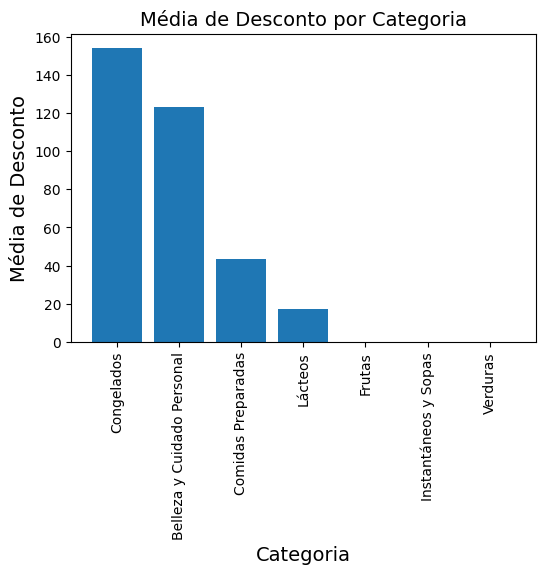

In [51]:
# Seu código aqui
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values('Desconto', ascending=False)

# Cria um dicionário com os nomes das categorias melhor formatados
nomenclatura = {
    'congelados' : 'Congelados',
    'belleza-y-cuidado-personal' : 'Belleza y Cuidado Personal',
    'lacteos' : 'Lácteos',
    'verduras' : 'Verduras',
    'frutas' : 'Frutas',
    'comidas-preparadas' : 'Comidas Preparadas',
    'instantaneos-y-sopas' : 'Instantáneos y Sopas'
}

plt.figure(figsize=(6, 4))
plt.bar(desconto_por_categoria['Categoria'], desconto_por_categoria['Desconto'])
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Média de Desconto', fontsize=14)
plt.title('Média de Desconto por Categoria', fontsize=14)

# Aplica as nomenclaturas no eixo X
plt.xticks(desconto_por_categoria['Categoria'],
           desconto_por_categoria['Categoria'].map(nomenclatura),
           rotation=90)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [53]:
# Seu código aqui
desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Desconsidera as categorias que possuem desconto 0 (o que impede da criação do gráfico)
desconto_por_categoria_marca = desconto_por_categoria_marca[desconto_por_categoria_marca['Desconto'] != 0]

# Cria uma nova coluna com os nomes melhor formatados
desconto_por_categoria_marca['Categoria_Nome'] = desconto_por_categoria_marca['Categoria'].map(nomenclatura)

fig = px.treemap(desconto_por_categoria_marca, path=['Categoria_Nome', 'Marca'],  # Indica no path a nova coluna de nomes
                 values='Desconto',
                 color='Desconto',
                 hover_data=['Desconto'],
                 color_continuous_scale='RdBu',
                 title='Média de Desconto por Categoria e Marca')
fig.show()